## Introduction to neural Network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification  problems.

A classification is where we try to classify something as one thing or another.

A few types of classification problems:
* Binary classification 
* Multiclass classification
* Multilabel classification



In [38]:
import tensorflow as tf
import numpy as np



## Creating data to view and fit 

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples, 
                   noise=0.03,
                   random_state=42)


In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is little hard to undersdand right now ... let's visualize it!

In [5]:
import pandas as pd 
circles = pd.DataFrame({"X0":X[:,0], "X1": X[:,1], "label":y})
circles 

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


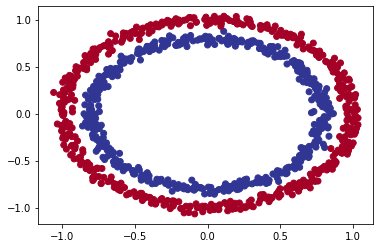

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y,cmap=plt.cm.RdYlBu)

🔨 We can also play around with  [playground.tensorflow](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.25528&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) networks. See what happens when we change different hyperparameters

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape 

((1000, 2), (1000,))

In [8]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [9]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [10]:
# How many samples we're working on
len(X) , len(y)

(1000, 1000)

In [11]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling 

The steps in modelling with Tensorflow are typically : 
1.  Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate..

In [17]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])


# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X,y, epochs=15)

Epoch 1/15
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/15
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/15
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830
Epoch 6/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4990
Epoch 7/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 8/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4950
Epoch 9/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4840
Epoch 10/15
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4820
Epoch 11/15
32/32 [

In [20]:
# Let's try and imporve our model by trainning for longer
model_1.fit(X,y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification  and our model is getting around ~50% accuracy... it's performing as  if it's guessing
So let's step things up to notch and add an extra layer

In [22]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model, this time with 2 layers
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X,y, epochs=100, verbose=0)


In [23]:
# 4. Evaluate the model
model_2.evaluate(X,y )

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

##Improving our model
Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden unit within  a layer
2. Compiling a model - here we might chosse a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we migth fi our model for more epochs(leave it training for longer )

In [35]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model ( this time 3 layers)
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100), # add 100 dense neurons
                               tf.keras.layers.Dense(100), # add another layer with 10 neurons
                               tf.keras.layers.Dense(1)
])

# 2. COmpile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X,y, epochs=100, verbose=0)


In [36]:
# 4 . Evavluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7043 - accuracy: 0.5060


[0.7042522430419922, 0.5059999823570251]

###Visulizing the model prediction

In [ ]:
# model_3.predict(X)


 To visulize our model's predictions, let's create a function `plot_decision_boundary()`, this function going to :

*Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make prediction across the meshgrid
* plot the prediction as well as a line between zone(where each unique class falls)


In [43]:
 
def plot_decision_boundary (model,X,y):
  """
  Plot the decision boudary created by a model predicting on X.
  this function was inspired by two resources:
  1. https://github.com/GokuMohandas/MadeWithML
  2. TF Multilayer Perception
  """
  # Define the axis boudaries of the plot and create a meshgrid
  x_min, x_max =X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max =X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
                                   np.linspace(y_min,y_max,100))
  
  # Create X value (we're going to make prediction on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  #make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    #we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshpae(xx.shape)

  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  # Plot the decision boundary
  plt.contourf(xx,yy, y_pred, cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


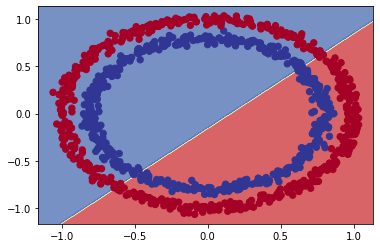

In [45]:
# Check our the prediction our model is making 
plot_decision_boundary(model=model_3, X=X, y=y)

In [65]:
# Let's see if our model can be used for a regression problem..
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression =tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

X_reg_test, y_reg_test

# Fit our model to the regression data
# model_3.fit(X_reg_train, y_reg_train, epochs=100) # Intentional Error 

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810,
        815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875,
        880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940,
        945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([ 850,  855,  860,  865,  870,  875,  880,  885,  890,  895,  900,
         905,  910,  915,  920,  925,  930,  935,  940,  945,  950,  955,
         960,  965,  970,  975,  980,  985,  990,  995, 1000, 1005, 1010,
        1015, 1020, 1025, 1030, 1035, 1040, 1045, 1050, 1055, 1060, 1065,
        1070, 1075, 1080, 1085, 1090, 1095], dtype=int32)>)

We compiled our model for a binary classification problem.
But .. now we're working on a regression problem, let's change the model to suit our data

In [66]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model ( this time 3 layers)
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100), # add 100 dense neurons
                               tf.keras.layers.Dense(100), # add another layer with 10 neurons
                               tf.keras.layers.Dense(1)
])

# 2. COmpile the model , this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_reg_train,y_reg_train, epochs=100)


Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 397.4693 - mae: 397.4693
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 113.0819 - mae: 113.0819
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 114.7017 - mae: 114.7017
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 76.1816 - mae: 76.1816
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 59.5844 - mae: 59.5844
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 45.5090 - mae: 45.5090
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 44.8177 - mae: 44.8177
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 48.1706 - mae: 48.1706
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 44.5871 - mae: 44.5871
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 44.3696 - mae: 44.3696
Epoch 11/100
5/5 [==============================] - 0

In [67]:
len(y_reg_preds) ,len(X_reg_test), len(y_reg_test)

(50, 50, 50)

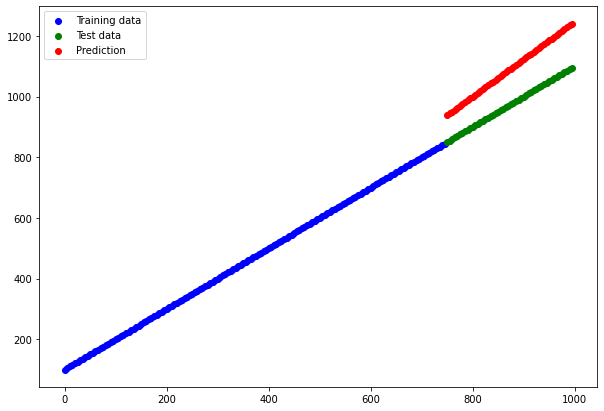

In [68]:
# Make prediction with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's prediction  against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Prediction")
plt.legend()


## The missing picec : Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1.Create the model
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X,y, epochs=100)

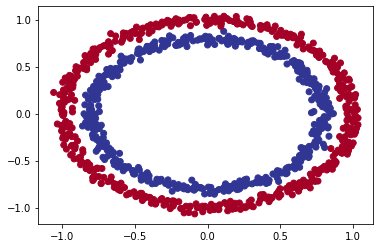

In [72]:
# Check out  our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

doing binary classification


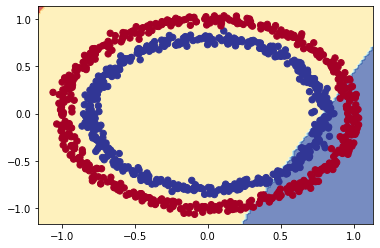

In [73]:
# Check the decision boudary for model 4
plot_decision_boundary(model=model_4, X=X,y=y)

Let's try build our first neural Network for our Non-linear activation function


In [75]:
# Set the random seed
tf.random.set_seed(42)

# 1.Create the model with a non-linear activation 
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_5 = model_5.fit(X,y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/